In [1]:
import json

f = open('rankings_actors.json', 'r')

original_data = json.load(f)
f.close()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import joypy

In [3]:
print(original_data)

[{'strat': 'Governments', 'mu': 3.9856940949179642, 'sigma': 0.7820039157470787}, {'strat': 'Researchers and companies', 'mu': 3.057903834351394, 'sigma': 0.7804346050168929}, {'strat': 'People', 'mu': 2.5651698346657708, 'sigma': 0.7823522713771596}]


In [4]:
import scipy.stats as stats

def norm(mu, sigma, n = 1000):
  a = mu - 3*sigma
  b = mu + 3*sigma
  dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
  return dist.rvs(n)

In [5]:
# created the basic data structure that will be plotted



data = []
for i in range(len(original_data)):
  d = original_data[i]
  n = 100000
  values = norm(d['mu'], d['sigma'], n)  
  strat = str(i+1).zfill(2) + '. ' + d['strat']
  for j in range(n):
    data.append([strat, values[j]])
    
df = pd.DataFrame(data, columns=['Actor', 'Value'])
print(df)

                  Actor     Value
0       01. Governments  3.979409
1       01. Governments  2.876543
2       01. Governments  4.274678
3       01. Governments  4.150577
4       01. Governments  3.282970
5       01. Governments  4.412742
6       01. Governments  4.464087
7       01. Governments  2.317428
8       01. Governments  2.435955
9       01. Governments  4.715160
10      01. Governments  3.176532
11      01. Governments  2.346654
12      01. Governments  4.664805
13      01. Governments  3.845043
14      01. Governments  3.840236
15      01. Governments  4.717259
16      01. Governments  3.944035
17      01. Governments  3.433745
18      01. Governments  2.536934
19      01. Governments  3.420065
20      01. Governments  3.902604
21      01. Governments  4.331614
22      01. Governments  3.767870
23      01. Governments  4.761721
24      01. Governments  4.415919
25      01. Governments  4.811035
26      01. Governments  2.973040
27      01. Governments  2.731550
28      01. Go

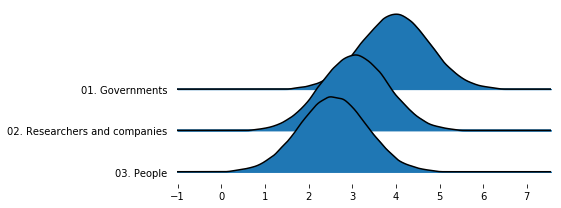

In [6]:
%matplotlib inline

fig, axes = joypy.joyplot(df, by="Actor",figsize=(8,3))